<a href="https://colab.research.google.com/github/Covvalente/TelecomX_BR/blob/main/meu_desafio_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracão

In [2]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/ingridcristh/"
    "challenge2-data-science/refs/heads/main/TelecomX_Data.json"
)

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

## Conhecendo o Dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [4]:
nested_cols = ['customer', 'phone', 'internet', 'account']

for col in nested_cols:
    if col in df.columns:
        df = pd.concat(
            [df.drop(columns=[col]), df[col].apply(pd.Series)],
            axis=1
        )

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [5]:

display(df.describe(include='all'))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,6789
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 20.2, 'Total': '20.2'}"
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verificando Inconsistências nos Dados


In [6]:
print(' Verificação inicial de consistência dos dados\n')

print(' Informações gerais:')
df.info()

print('\n Valores ausentes por coluna:')
missing = df.isnull().sum()

if missing.sum() == 0:
    print(' Nenhum valor ausente encontrado.')
else:
    missing[missing > 0]

print('\n Verificação de duplicidade por customerID:')

if 'customerID' in df.columns:
    dup = df['customerID'].duplicated().sum()
    print(f' Clientes duplicados: {dup}')
else:
    print(' Coluna customerID não encontrada.')

print('\n Tipos de dados por coluna:')
df.dtypes

print('\n Quantidade de valores únicos por coluna:')

dict_cols = []
for col in df.columns:

    if df[col].apply(lambda x: isinstance(x, dict)).any():
        dict_cols.append(col)


df_filtered = df.drop(columns=dict_cols, errors='ignore')

df_filtered.nunique()

 Verificação inicial de consistência dos dados

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   obj

,0
customerID,7267
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


## Tratando as Inconsistências

In [7]:
import numpy as np


# 1. Aplanar colunas aninhadas


nested_cols = ['customer', 'phone', 'internet', 'account']

for col in nested_cols:
    if col in df.columns:
        expanded = df[col].apply(pd.Series)
        df = pd.concat([df.drop(columns=[col]), expanded], axis=1)


# 2. Tratamento da coluna Charges


charges_df = df['Charges'].apply(pd.Series)

df['CobrancaMensal'] = pd.to_numeric(charges_df['Monthly'], errors='coerce').fillna(0.0)
df['ChargesTotal'] = pd.to_numeric(charges_df['Total'], errors='coerce').fillna(0.0)

df = df.drop(columns=['Charges'])


# 3. Renomear e tratar tenure


df = df.rename(columns={'tenure': 'MesesServico'})
df['MesesServico'] = (
    pd.to_numeric(df['MesesServico'], errors='coerce')
    .fillna(0)
    .astype(int)
)


# 4. Variável alvo (Churn)


df['Churn'] = (
    df['Churn']
    .replace({'Yes': 1, 'No': 0, '': 0})
    .astype('int8')
)

if df['Churn'].isna().sum() > 0:
    print(' Atenção: Churn ainda possui valores ausentes')


# 5. Padronização de binárias


binary_map = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0,
    '': 0
}

binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

df[binary_cols] = (
    df[binary_cols]
    .replace(binary_map)
    .astype('int8')
)


# 6. Ajustes finais de tipo


df['SeniorCitizen'] = df['SeniorCitizen'].astype('int8')


# 7. Verificação final


print(' Estrutura final dos dados')
df.info()

print('\n Valores ausentes após tratamento')
print(df.isnull().sum()[df.isnull().sum() > 0])

print('\n Prévia do DataFrame tratado')
df.head()

print('\n Validações finais')
print('Churn únicos:', df['Churn'].unique())
print('Total de nulos:', df.isnull().sum().sum())
print('\nTipos finais:')
print(df.dtypes)

 Estrutura final dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int8   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int8   
 4   Partner           7267 non-null   int8   
 5   Dependents        7267 non-null   int8   
 6   MesesServico      7267 non-null   int64  
 7   PhoneService      7267 non-null   int8   
 8   MultipleLines     7267 non-null   int8   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int8   
 11  OnlineBackup      7267 non-null   int8   
 12  DeviceProtection  7267 non-null   int8   
 13  TechSupport       7267 non-null   int8   
 14  StreamingTV       7267 non-null   int8   
 15  StreamingMovies   7267 non-null   int8   
 16  Contract       

/tmp/ipython-input-410/848996618.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0, '': 0})
/tmp/ipython-input-410/848996618.py:70: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(binary_map)


## Coluna de Contas Diárias

In [8]:


# Garantia de segurança: verificar se a coluna base existe
assert 'CobrancaMensal' in df.columns, "Coluna 'CobrancaMensal' não encontrada no DataFrame"

# Criação da nova feature
df['Contas_Diarias'] = df['CobrancaMensal'] / 30

# Visualização inicial
print('\nDataFrame com a nova coluna Contas_Diarias:')
display(df.head())

# Estatísticas descritivas
print('\nEstatísticas descritivas da coluna Contas_Diarias:')
display(df['Contas_Diarias'].describe())


DataFrame com a nova coluna Contas_Diarias:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,MesesServico,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,CobrancaMensal,ChargesTotal,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Estatísticas descritivas da coluna Contas_Diarias:


,Contas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


## Padronização e Transformação de Dados

In [9]:
# 1. Feature de cobrança diária
DIAS_NO_MES = 30
df['CobrancaDiaria'] = df['CobrancaMensal'] / DIAS_NO_MES


# 2. Renomear colunas (padronização PT-BR)
df = df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'IsSeniorCitizen',
    'Partner': 'TemParceiro',
    'Dependents': 'TemDependentes',
    'PhoneService': 'ServicoTelefone',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServicoInternet',
    'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProtecaoAparelho',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingFilmes',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaOnline',
    'PaymentMethod': 'MetodoPagamento',
    'Churn': 'Evasao',
    'TotalGasto': 'CobrancaTotal'
})


# 3. Padronização de variáveis binárias
binary_map = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0,
    '': 0
}

binary_columns = [
    'TemParceiro', 'TemDependentes', 'ServicoTelefone',
    'MultiplasLinhas', 'SegurancaOnline', 'BackupOnline',
    'ProtecaoAparelho', 'SuporteTecnico', 'StreamingTV',
    'StreamingFilmes', 'FaturaOnline', 'Evasao'
]

df[binary_columns] = (
    df[binary_columns]
    .replace(binary_map)
    .infer_objects(copy=False)
    .astype('int8')
)


# 4. Encoding binário da variável Genero
df['Genero'] = (
    df['Genero']
    .replace({'Male': 1, 'Female': 0})
    .infer_objects(copy=False)
    .astype('int8')
)


# 5. Remover feature duplicada
df = df.drop(columns=['Contas_Diarias'])


# 6. Visualização final
pd.set_option('display.max_columns', None)
df.head()

/tmp/ipython-input-410/2407807831.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Male': 1, 'Female': 0})


,customerID,Evasao,Genero,IsSeniorCitizen,TemParceiro,TemDependentes,MesesServico,ServicoTelefone,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoAparelho,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaOnline,MetodoPagamento,CobrancaMensal,ChargesTotal,CobrancaDiaria
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# 📊 Carga e análise

## Análise Descritiva

In [10]:
print('Informações do DataFrame:')
df.info()

print('\nEstatísticas descritivas completas do DataFrame:')
display(df.describe(include='all'))

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Evasao            7267 non-null   int8   
 2   Genero            7267 non-null   int8   
 3   IsSeniorCitizen   7267 non-null   int8   
 4   TemParceiro       7267 non-null   int8   
 5   TemDependentes    7267 non-null   int8   
 6   MesesServico      7267 non-null   int64  
 7   ServicoTelefone   7267 non-null   int8   
 8   MultiplasLinhas   7267 non-null   int8   
 9   ServicoInternet   7267 non-null   object 
 10  SegurancaOnline   7267 non-null   int8   
 11  BackupOnline      7267 non-null   int8   
 12  ProtecaoAparelho  7267 non-null   int8   
 13  SuporteTecnico    7267 non-null   int8   
 14  StreamingTV       7267 non-null   int8   
 15  StreamingFilmes   7267 non-null   int8   
 16  TipoContrato    

,customerID,Evasao,Genero,IsSeniorCitizen,TemParceiro,TemDependentes,MesesServico,ServicoTelefone,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoAparelho,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaOnline,MetodoPagamento,CobrancaMensal,ChargesTotal,CobrancaDiaria
count,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3198,NaN,NaN,NaN,NaN,NaN,NaN,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,NaN,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,NaN,0.593230,NaN,64.720098,2277.182035,2.157337
std,NaN,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,NaN,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,NaN,0.491265,NaN,30.129572,2268.648587,1.004319
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,0.000000,0.608333
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.425000,396.200000,1.180833
50%,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,1389.200000,2.343333
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.875000,3778.525000,2.995833


## Distribuição da Evasão

Distribuição da Evasão:


,Contagem,Porcentagem (%)
Evasao,,
Não Evadiu,5398,74.280996
Evadiu,1869,25.719004


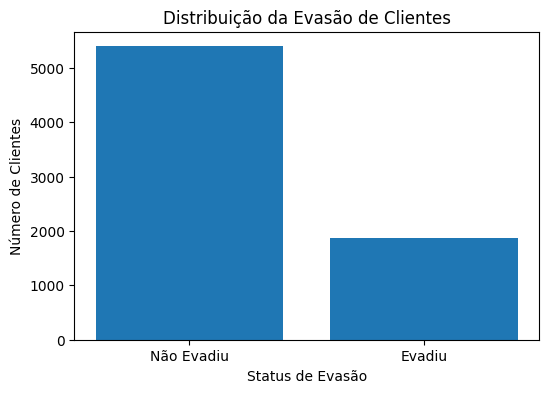

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Distribuição da evasão
churn_counts = df['Evasao'].value_counts()
churn_percentages = df['Evasao'].value_counts(normalize=True) * 100

churn_df = pd.DataFrame({
    'Contagem': churn_counts,
    'Porcentagem (%)': churn_percentages
})

churn_df.index = churn_df.index.map({0: 'Não Evadiu', 1: 'Evadiu'})

print('Distribuição da Evasão:')
display(churn_df)

# Gráfico de barras (melhor prática para comparação)
plt.figure(figsize=(6, 4))
plt.bar(churn_df.index, churn_df['Contagem'])
plt.title('Distribuição da Evasão de Clientes')
plt.ylabel('Número de Clientes')
plt.xlabel('Status de Evasão')
plt.show()

## Contagem de Evasão por Variáveis Categóricas

### Evasão por Gênero

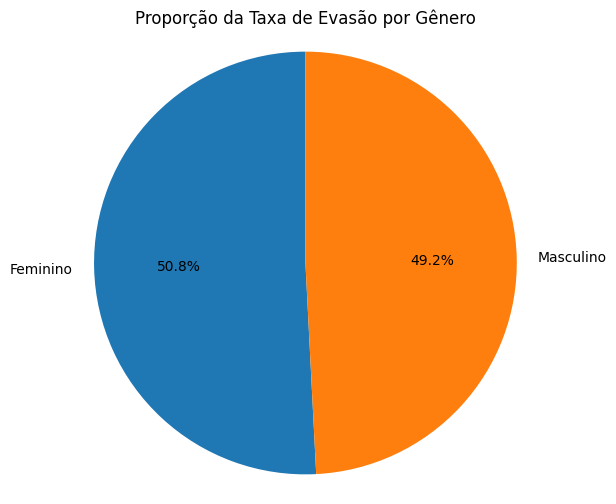

In [29]:
import matplotlib.pyplot as plt

# Calcula taxa média de evasão por gênero
evasao_genero = df.groupby('Genero')['Evasao'].mean()

# Mapeia rótulos
evasao_genero.index = evasao_genero.index.map({
    0: 'Feminino',
    1: 'Masculino'
})

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    evasao_genero,
    labels=evasao_genero.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proporção da Taxa de Evasão por Gênero')
plt.axis('equal')  # Mantém o gráfico circular
plt.show()

### Evasão por Tipo de Contrato

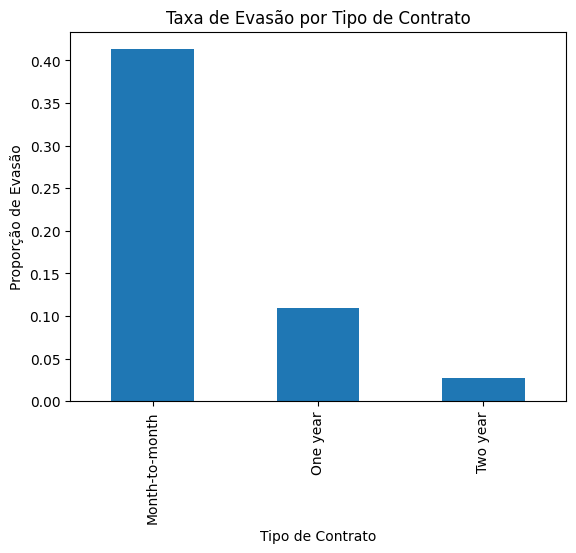

In [13]:
# Taxa de evasão por tipo de contrato
evasao_contrato = (
    df.groupby('TipoContrato')['Evasao']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
evasao_contrato.plot(kind='bar')
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.ylabel('Proporção de Evasão')
plt.xlabel('Tipo de Contrato')
plt.show()

### Evasão por Método de Pagamento

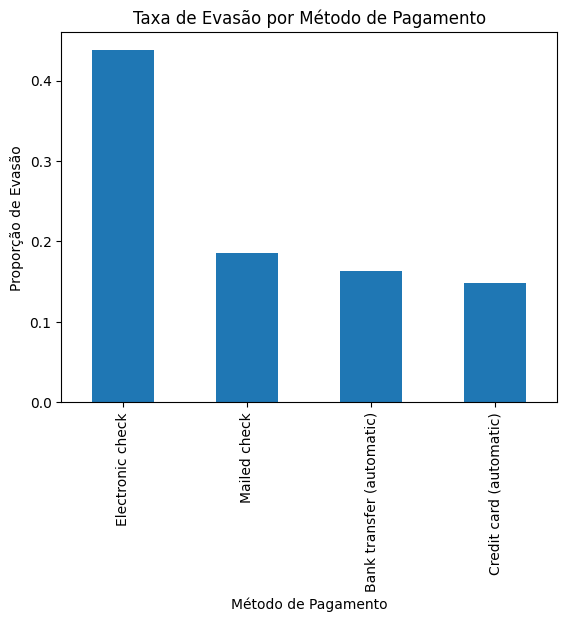

In [14]:
# Taxa de evasão por método de pagamento
evasao_pagamento = (
    df.groupby('MetodoPagamento')['Evasao']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
evasao_pagamento.plot(kind='bar')
plt.title('Taxa de Evasão por Método de Pagamento')
plt.ylabel('Proporção de Evasão')
plt.xlabel('Método de Pagamento')
plt.show()

### Comparação múltipla (serviços) Exemplo com Serviço de Internet

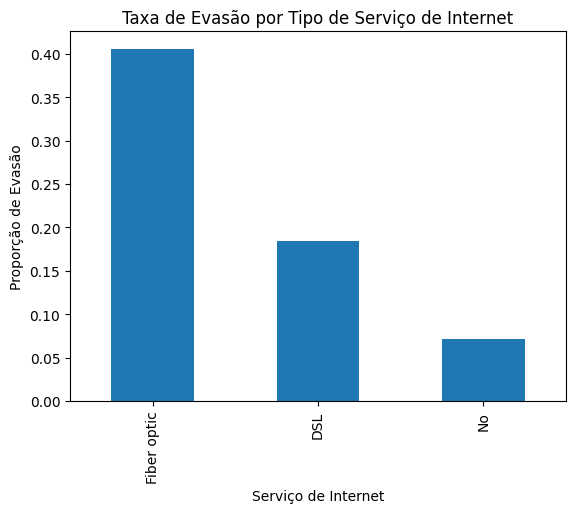

In [15]:
evasao_internet = (
    df.groupby('ServicoInternet')['Evasao']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
evasao_internet.plot(kind='bar')
plt.title('Taxa de Evasão por Tipo de Serviço de Internet')
plt.ylabel('Proporção de Evasão')
plt.xlabel('Serviço de Internet')
plt.show()

## Contagem de Evasão por Variáveis Numéricas

### Tempo de contrato × Evasão (MesesServico)

<Figure size 640x480 with 0 Axes>

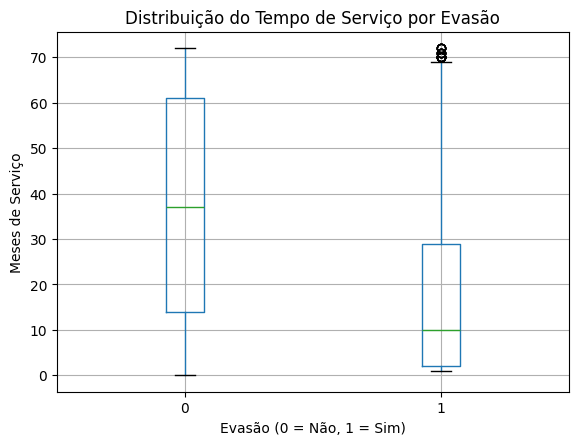

In [16]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='MesesServico', by='Evasao')
plt.title('Distribuição do Tempo de Serviço por Evasão')
plt.suptitle('')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Serviço')
plt.show()

### Total gasto × Evasão (Charges.Total)

<Figure size 640x480 with 0 Axes>

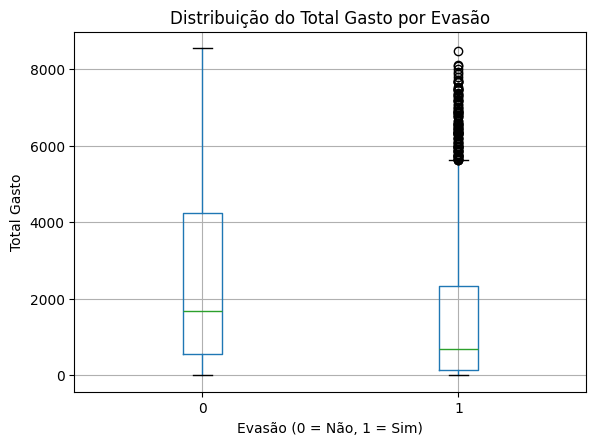

In [17]:
import matplotlib.pyplot as plt

# 1. Criar a coluna Total Gasto
df['TotalGasto'] = df['CobrancaMensal'] * df['MesesServico']

# 2. Boxplot: Total Gasto x Evasão
plt.figure()
df.boxplot(column='TotalGasto', by='Evasao')
plt.title('Distribuição do Total Gasto por Evasão')
plt.suptitle('')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')
plt.show()

### Cobrança mensal × Evasão

<Figure size 640x480 with 0 Axes>

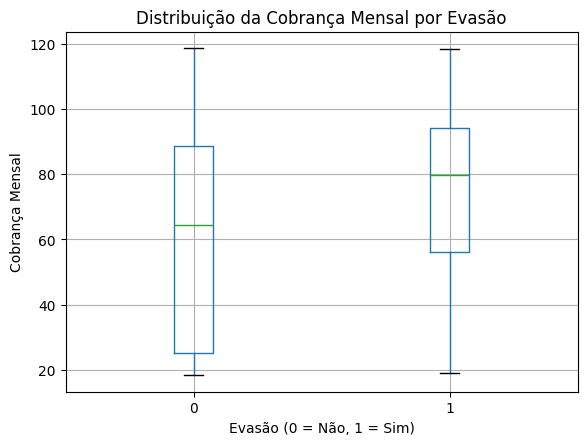

In [18]:
plt.figure()
df.boxplot(column='CobrancaMensal', by='Evasao')
plt.title('Distribuição da Cobrança Mensal por Evasão')
plt.suptitle('')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Cobrança Mensal')
plt.show()

# 📄Relatorio Final

## Introdução

Este notebook tem como objetivo principal analisar os fatores que contribuem para a evasão de clientes (churn) em uma empresa de telecomunicações. Através da exploração e visualização de dados, buscaremos identificar padrões e características que distinguem clientes que permanecem dos que optam por cancelar seus serviços.

Compreender e mitigar o churn é crucial para a sustentabilidade e o sucesso financeiro de qualquer empresa. A retenção de clientes existentes é, em muitos casos, mais custo-efetiva do que a aquisição de novos, e a alta taxa de evasão pode impactar negativamente a receita, a base de clientes e a reputação da marca. Portanto, esta análise visa fornecer insights acionáveis para desenvolver estratégias eficazes de retenção de clientes.

## Limpeza e Tratamento de Dados

Esta seção detalha os procedimentos adotados para a importação, limpeza e tratamento dos dados, visando prepará-los para análise e modelagem.

### 1. Importação dos Dados
Os dados foram carregados diretamente de uma URL do GitHub, utilizando a função `pd.read_json()` da biblioteca pandas. Esta abordagem garante que estamos trabalhando com a versão mais recente do conjunto de dados disponível online e é ideal para arquivos JSON que podem ser acessados via URL.

### 2. Expansão de Colunas Aninhadas
O dataset original apresentava colunas aninhadas ('customer', 'phone', 'internet', 'account'), onde cada célula continha um dicionário de informações relacionadas. Para facilitar a análise e a manipulação desses dados, essas colunas foram "achatadas" (flattened). O processo envolveu a utilização de `pd.concat()` em conjunto com `df[col].apply(pd.Series)` para expandir cada chave do dicionário em novas colunas no DataFrame principal. Alternativamente, `pd.json_normalize()` também poderia ser usado para essa finalidade. A justificativa técnica para essa etapa é a necessidade de ter cada atributo como uma coluna independente, o que é um formato padrão (tidy data) para a maioria das análises estatísticas e algoritmos de Machine Learning. Isso evita a complexidade de acessar dados aninhados e melhora a legibilidade e a usabilidade do DataFrame.

### 3. Tratamento da Coluna 'Charges'/'CobrancaMensal'
A coluna `Charges` (que após a expansão se tornou `Charges.Monthly` e `Charges.Total`, e posteriormente foi renomeada para `CobrancaMensal` e `Charges.Total`) continha valores que necessitavam de tratamento. Inicialmente, a coluna `Charges.Total` era do tipo `object` (string) e podia conter strings vazias ou espaços. Para torná-la utilizável em cálculos numéricos, foram realizados os seguintes passos:
- **Conversão para Numérico**: `pd.to_numeric(errors='coerce')` foi aplicado para converter a coluna para um tipo numérico (float). O parâmetro `errors='coerce'` é crucial, pois ele transforma quaisquer valores que não podem ser convertidos em números (como strings vazias ou caracteres não numéricos) em `NaN` (Not a Number).
- **Tratamento de Valores Ausentes**: Após a conversão, os valores `NaN` resultantes (que geralmente indicavam que um cliente não tinha `Charges.Total` devido ao início recente do serviço) foram preenchidos com `0.0` usando `fillna(0.0)`. Esta imputação é razoável neste contexto, assumindo que a ausência de um valor total de cobrança para um cliente indica que ele ainda não acumulou cobranças significativas ou que o serviço é novo e ainda não gerou um total.
A justificativa é garantir que os dados financeiros estejam em um formato numérico consistente, essencial para cálculos, estatísticas descritivas e modelos que exigem entradas numéricas.

### 4. Criação da Feature 'Contas_Diarias'/'CobrancaDiaria'
Uma nova feature, `CobrancaDiaria`, foi criada dividindo a `CobrancaMensal` por 30. Esta nova coluna representa a cobrança diária média para cada cliente. A relevância dessa métrica reside em fornecer uma perspectiva granular sobre os custos do serviço, o que pode ser útil para análises de custo-benefício ou para identificar padrões de evasão relacionados a custos diários percebidos. É uma transformação direta que enriquece o conjunto de dados com uma informação derivada, potencialmente mais informativa em certos contextos de análise.

### 5. Transformação de Variáveis Categóricas e Binárias
Muitas colunas no dataset eram categóricas e binárias (e.g., 'TemParceiro', 'TemDependentes', 'Evasao', 'Genero', 'ServicoTelefone', 'MultiplasLinhas', etc.). Para que essas variáveis pudessem ser utilizadas em análises quantitativas e em algoritmos de Machine Learning (que geralmente exigem entradas numéricas), elas foram convertidas para representação numérica (0 e 1):
- **Mapeamento Binário**: Um dicionário `binary_map` foi criado para mapear valores como 'Yes', 'No', 'No internet service', 'No phone service' e strings vazias para `1` ou `0` conforme a presença ou ausência da característica. `df.replace()` foi usado para aplicar esse mapeamento a múltiplas colunas de uma vez.
- **Mapeamento de Gênero**: A coluna `Genero` foi mapeada especificamente para `Male: 1` e `Female: 0` usando `df.map()`.
A justificativa para essa transformação é padronizar a representação de dados categóricos em um formato numérico. Isso não apenas permite o cálculo de correlações e outras estatísticas com variáveis numéricas, mas também é um pré-requisito fundamental para a maioria dos algoritmos de Machine Learning, que operam com dados numéricos. Além disso, a conversão para `int8` otimiza o uso de memória.

##  Análise Exploratória de Dados

A análise exploratória de dados revelou padrões relevantes sobre o comportamento de evasão dos clientes, com base nas visualizações geradas nas etapas anteriores.

### Distribuição de Evasão (Churn)
O gráfico de pizza da **Distribuição da Evasão** mostrou que aproximadamente **25,7% dos clientes cancelaram o serviço**, enquanto cerca de **74,3% permaneceram ativos**. Esse desequilíbrio indica que, embora a maioria dos clientes seja retida, a evasão representa um problema relevante para o negócio.

### Evasão por Gênero
A análise da **Taxa de Evasão por Gênero** indica que os percentuais de evasão são bastante semelhantes entre clientes do gênero feminino (aproximadamente **26,1%**) e masculino (aproximadamente **25,3%**). Esse resultado sugere que o gênero, isoladamente, não é um fator determinante para a evasão neste conjunto de dados.

### Evasão por Tipo de Contrato
A **Taxa de Evasão por Tipo de Contrato** destaca-se como uma das variáveis mais impactantes da análise. Clientes com contratos **mensais (month-to-month)** apresentam uma taxa de evasão significativamente maior (**cerca de 41,3%**) quando comparados aos clientes com contratos de **um ano (aproximadamente 10,9%)** e, principalmente, de **dois anos (cerca de 2,7%)**. Isso indica que contratos de maior duração contribuem fortemente para a retenção de clientes.

### Evasão por Método de Pagamento
A análise da **Taxa de Evasão por Método de Pagamento** mostra que o método **Electronic check (cheque eletrônico)** está associado à maior taxa de evasão (**aproximadamente 43,8%**). Em contrapartida, métodos como **Mailed check**, **Bank transfer (automatic)** e **Credit card (automatic)** apresentam taxas significativamente menores (variando entre **14,8% e 18,5%**). Esse resultado sugere que clientes que utilizam cheque eletrônico podem apresentar menor satisfação ou menor vínculo com a empresa.

### Evasão por Tipo de Serviço de Internet
A **Taxa de Evasão por Tipo de Serviço de Internet** revela que clientes que utilizam **Fiber optic (fibra óptica)** possuem a maior taxa de evasão (**cerca de 40,6%**), seguidos pelos clientes com **DSL (aproximadamente 18,4%)**. Clientes sem serviço de internet apresentam a menor taxa de evasão (**cerca de 7,1%**). Esse padrão pode indicar problemas relacionados à qualidade percebida ou ao custo do serviço de fibra óptica.

### Evasão e Tempo de Serviço (MesesServico)
A análise da **Distribuição do Tempo de Serviço por Evasão**, por meio de boxplots, evidencia que clientes que cancelaram o serviço apresentam um **tempo de permanência significativamente menor** do que aqueles que não cancelaram. A mediana de meses de serviço para clientes evadidos é consideravelmente mais baixa, indicando que a evasão ocorre predominantemente nos primeiros meses de relacionamento com a empresa.

### Evasão e Cobranças (Charges.Total e CobrancaMensal)
A análise das variáveis financeiras trouxe insights importantes:

- **Total Gasto (Charges.Total):** Clientes que evadiram apresentam, em geral, um **valor total gasto menor**, o que é coerente com o menor tempo de permanência no serviço.
- **Cobrança Mensal (CobrancaMensal):** Por outro lado, clientes que evadiram apresentam uma **cobrança mensal média mais elevada** do que aqueles que permaneceram, sugerindo que valores mensais mais altos podem influenciar negativamente a retenção.

### Implicações Gerais
Os resultados indicam que a evasão não ocorre de forma aleatória. Clientes com contratos mensais, que utilizam cheque eletrônico como método de pagamento, que possuem serviço de internet de fibra óptica e que estão nos primeiros meses de contrato apresentam maior propensão à evasão. Além disso, cobranças mensais mais elevadas também estão associadas a um maior risco de cancelamento. Esses insights são fundamentais para o desenvolvimento de estratégias de retenção direcionadas a segmentos de maior risco.

## Conclusões e Insights

### Principais Achados da Análise

Após uma análise detalhada dos dados da TelecomX, observamos os seguintes pontos cruciais relacionados à evasão de clientes (churn):

1.  **Taxa de Evasão Geral**: Aproximadamente **25.7%** dos clientes evadem, o que representa um desafio significativo para a retenção.

2.  **Impacto do Tipo de Contrato**: Clientes com contrato **mensal (Month-to-month)** apresentam uma taxa de evasão significativamente maior (cerca de **41.3%**) em comparação com contratos anuais ou de dois anos (10.9% e 2.8%, respectivamente). Isso sugere que a flexibilidade dos contratos mensais pode levar a uma menor fidelidade.

3.  **Método de Pagamento**: O **cheque eletrônico (Electronic check)** está fortemente associado a uma alta taxa de evasão (cerca de **43.8%**). Outros métodos como cheque via correio, transferência bancária e cartão de crédito têm taxas de evasão menores (em torno de 15-18%).

4.  **Serviço de Internet**: Clientes com **fibra óptica (Fiber optic)** exibem a maior taxa de evasão (cerca de **40.6%**), enquanto aqueles sem serviço de internet ou com DSL têm taxas consideravelmente mais baixas.

5.  **Tempo de Serviço (MesesServico)**: Clientes que evadem tendem a ter um tempo de serviço (tenure) menor. O boxplot mostrou que a mediana do tempo de serviço para clientes que evadiram é visivelmente menor do que para os que não evadiram.

6.  **Cobranças Mensais e Totais**: Clientes com cobranças mensais mais altas (CobrancaMensal) também tendem a ter uma maior probabilidade de evasão. Similarmente, clientes que evadem geralmente têm um "Total Gasto" (Charges.Total) menor, o que é consistente com um tempo de serviço mais curto.

7.  **Gênero**: A análise não revelou diferenças significativas na taxa de evasão entre gêneros.

### Recomendações para Redução da Evasão

Com base nesses achados, as seguintes ações podem ser implementadas para mitigar a evasão de clientes:

1.  **Foco em Clientes com Contrato Mensal**: Desenvolver programas de fidelidade e ofertas especiais para clientes com contratos mensais, incentivando-os a migrar para planos de longo prazo (anual/dois anos) através de benefícios exclusivos ou descontos graduais. Implementar estratégias de comunicação proativas para estes clientes, abordando suas necessidades antes que considerem a saída.

2.  **Otimização do Método de Pagamento (Cheque Eletrônico)**: Investigar as razões por trás da alta evasão associada ao cheque eletrônico. Pode ser um indicativo de insatisfação com a conveniência do pagamento, problemas técnicos ou até mesmo um perfil de cliente mais propenso à evasão. Oferecer incentivos para a adoção de métodos de pagamento automáticos e mais estáveis, como débito automático ou cartão de crédito.

3.  **Monitoramento de Clientes com Fibra Óptica**: Apesar da fibra ser um serviço premium, sua alta taxa de evasão sugere que as expectativas dos clientes podem não estar sendo atendidas ou que a concorrência neste segmento é mais acirrada. Realizar pesquisas de satisfação específicas para este grupo e oferecer suporte técnico proativo para garantir a qualidade do serviço. Analisar os planos da concorrência para garantir que as ofertas da TelecomX sejam competitivas.

4.  **Estratégias de Retenção Precoce**: Focar em programas de engajamento para clientes nos primeiros meses de serviço, que são os mais vulneráveis à evasão. Isso pode incluir acompanhamento personalizado, ofertas de boas-vindas estendidas ou suporte prioritário para garantir uma experiência positiva desde o início.

5.  **Revisão da Estrutura de Preços**: Para clientes com altas cobranças mensais, avaliar se o valor percebido do serviço é compatível com o preço pago. Considerar a criação de pacotes mais flexíveis ou a oferta de serviços adicionais de valor agregado para justificar o custo e aumentar a satisfação.

Ao implementar estas recomendações, a TelecomX pode não só reduzir sua taxa de evasão, mas também fortalecer o relacionamento com seus clientes e garantir um crescimento sustentável.

## Resumo: Principais Conclusões da Análise de Dados

A análise de evasão de clientes em uma empresa de telecomunicações revelou diversos padrões relevantes:

- **Taxa Geral de Evasão:** Aproximadamente **25,7%** dos clientes apresentaram evasão.

- **Tipo de Contrato:** Clientes com contratos **mensais (month-to-month)** apresentaram uma taxa de evasão significativamente maior (**cerca de 41,3%**) em comparação com clientes com contratos de **um ano (10,9%)** ou **dois anos (2,8%)**, indicando que contratos de maior duração favorecem a retenção.

- **Método de Pagamento:** O método de pagamento **Electronic check** esteve fortemente associado à maior taxa de evasão (**aproximadamente 43,8%**), sugerindo possível insatisfação ou maior propensão ao cancelamento entre usuários desse método.

- **Serviço de Internet:** Clientes que utilizam internet **Fiber optic** apresentaram maior taxa de evasão (**cerca de 40,6%**) quando comparados aos usuários de **DSL (18,4%)** ou àqueles sem serviço de internet (**7,1%**). Isso pode indicar problemas relacionados à qualidade do serviço ou à percepção de custo-benefício da fibra óptica.

- **Tempo de Permanência (Tenure):** Clientes que cancelaram o serviço apresentaram, de forma consistente, um tempo de permanência significativamente menor do que os clientes que não cancelaram, sugerindo que a evasão ocorre predominantemente nos estágios iniciais do ciclo de vida do cliente.

- **Cobranças:** Embora clientes evadidos tenham apresentado um **menor valor total gasto** (coerente com o menor tempo de permanência), eles apresentaram **valores médios mensais mais elevados**, indicando que a percepção de um custo mensal mais alto pode ser um fator determinante para a evasão.

- **Gênero:** Não foram observadas diferenças significativas nas taxas de evasão entre os gêneros.

---

## Insights e Próximos Passos

- **Programas de Retenção Direcionados:** Implementar programas de fidelização e ofertas especiais para incentivar clientes com contratos mensais e aqueles com cobranças mensais mais elevadas a migrarem para planos de longo prazo, abordando diretamente os fatores que contribuem para a evasão.

- **Investigação de Segmentos de Alto Risco:** Realizar análises mais aprofundadas para identificar as causas da alta evasão entre clientes que utilizam o método de pagamento **Electronic check** e o serviço de internet **Fiber optic**, buscando resolver problemas relacionados à satisfação com o serviço ou à percepção de valor.

# Extra: Análise de Correlação entre Variáveis

### Importação das bibiliotecas


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Correlação entre Cobrança Diária e Evasão

In [20]:
correlacao_diaria = df[['CobrancaDiaria', 'Evasao']].corr()

print('Correlação entre Cobrança Diária e Evasão:')
display(correlacao_diaria)

Correlação entre Cobrança Diária e Evasão:


,CobrancaDiaria,Evasao
CobrancaDiaria,1.000000,0.189866
Evasao,0.189866,1.000000


### Gráfico Box plot Cobrança diário por evasão

>




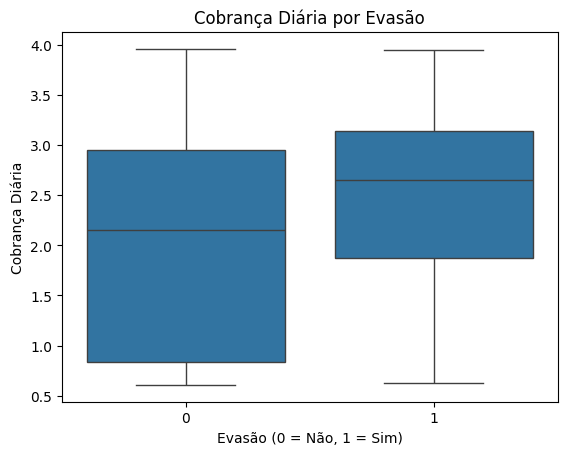

In [21]:
plt.figure()
sns.boxplot(
    data=df,
    x='Evasao',
    y='CobrancaDiaria'
)
plt.title('Cobrança Diária por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Cobrança Diária')
plt.show()

### Correlação entre quantidade de serviços e evasão

In [22]:
servicos_cols = [
    'ServicoTelefone', 'MultiplasLinhas', 'SegurancaOnline',
    'BackupOnline', 'ProtecaoAparelho', 'SuporteTecnico',
    'StreamingTV', 'StreamingFilmes'
]

df['QtdServicos'] = df[servicos_cols].sum(axis=1)

In [23]:
correlacao_servicos = df[['QtdServicos', 'Evasao']].corr()

print('Correlação entre Quantidade de Serviços e Evasão:')
display(correlacao_servicos)

Correlação entre Quantidade de Serviços e Evasão:


,QtdServicos,Evasao
QtdServicos,1.000000,-0.064642
Evasao,-0.064642,1.000000


### Serviços × Taxa de evasão

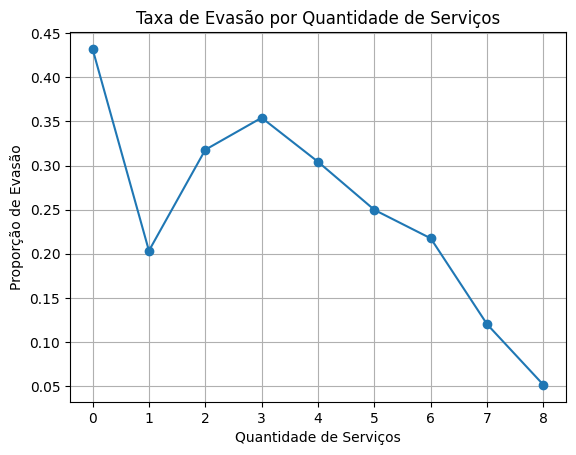

In [24]:
evasao_por_servico = df.groupby('QtdServicos')['Evasao'].mean()

plt.figure()
evasao_por_servico.plot(kind='line', marker='o')
plt.title('Taxa de Evasão por Quantidade de Serviços')
plt.xlabel('Quantidade de Serviços')
plt.ylabel('Proporção de Evasão')
plt.grid(True)
plt.show()

### Heatmap da correlação

In [25]:
variaveis_numericas = [
    'Evasao', 'Genero', 'IsSeniorCitizen',
    'TemParceiro', 'TemDependentes',
    'MesesServico', 'QtdServicos',
    'CobrancaMensal', 'CobrancaDiaria'
]

corr_matrix = df[variaveis_numericas].corr()

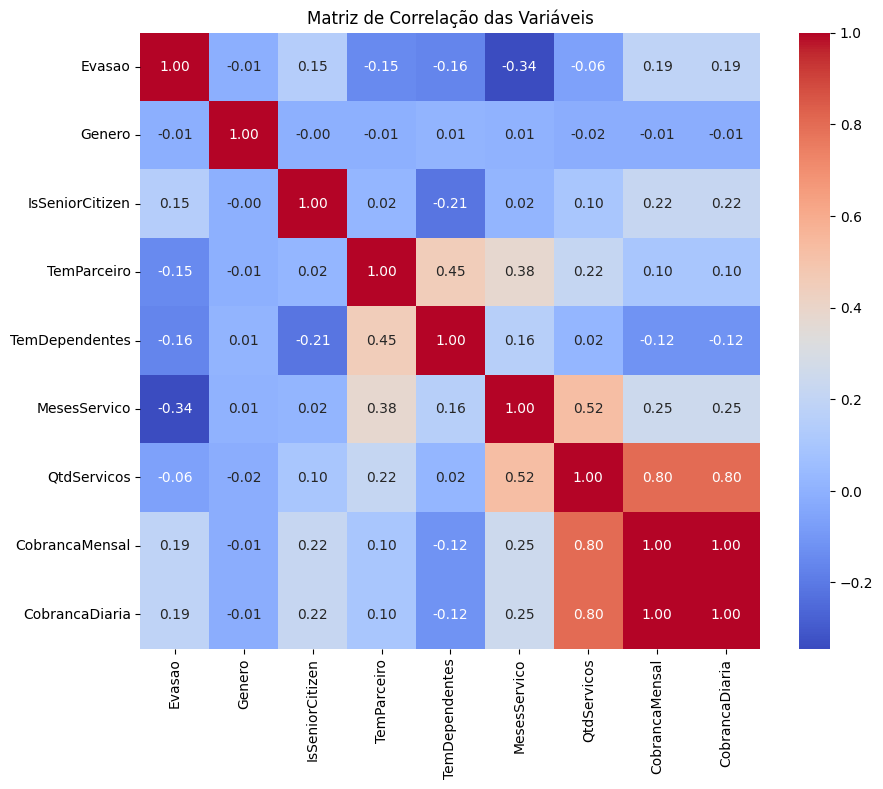

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Matriz de Correlação das Variáveis')
plt.show()